# Анализ датасета о продуктах

Ход работы:
1. Импортируйте библиотеки, которые были описаны на лекции
2. Импортируйте датасет foodmart.products.tsv, предварительно скачав его
3. Проведите анализ данных, используя лекционный файл 6 EDA в качестве примера.
 - Прим. *Для отображения используйте библиотеку seaborn или plotly!*
 - Отобразите 5 первых элементов таблицы и пять последних
 - Отобразите статистику по датасету, используя функции .info(), .describe()
 - Изучите таблицу на наличие дублей, удалите их, если обнаружите
 - Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)
 - Постройте матрицу корреляции признаков
 - Изучите пропуски, обработайте их удалением или заполнением (средним значением, модой и тд)
 - Поищите выбросы в данных. Их не удаляйте, добавьте новый столбец-маркер "Outlier" и отметьте в нем True для выбросов и False - в противоположном случае
 - Преобразуйте все данные к их истинным типам. Например, low_fat - к типу bool, подумайте, что нужно сделать. Числовые типы - соответственно к int или float
 - Приведите все столбцы строкового типа к нижнему регистру
 - brand_name дублируется в product_name, очистите product_name от дублирования

In [155]:
import pandas as pd
import seaborn as sns

In [156]:
%matplotlib inline
sns.set(color_codes=True)
df = pd.read_csv('foodmart.products.tsv', sep='\t')

In [157]:
df.head(5)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [158]:
df.tail(5)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
1555,53,1556,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.5
1556,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.3
1557,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.4
1558,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8
1559,31,1560,CDR,CDR Grape Jelly,54896665215,1.60,12.50,10.50,False,True,1,9,5.44,3.24,18.3


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   product_id          1560 non-null   int64  
 2   brand_name          1560 non-null   object 
 3   product_name        1560 non-null   object 
 4   SKU                 1560 non-null   int64  
 5   SRP                 1560 non-null   float64
 6   gross_weight        1560 non-null   float64
 7   net_weight          1560 non-null   float64
 8   recyclable_package  1560 non-null   bool   
 9   low_fat             1560 non-null   bool   
 10  units_per_case      1560 non-null   int64  
 11  cases_per_pallet    1560 non-null   int64  
 12  shelf_width         1560 non-null   float64
 13  shelf_height        1560 non-null   float64
 14  shelf_depth         1560 non-null   float64
dtypes: bool(2), float64(6), int64(5), object(2)
memory usag

In [160]:
df.describe()

,product_class_id,product_id,SKU,SRP,gross_weight,net_weight,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
count,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,54.403205,780.500000,5.562930e+10,2.117282,13.804821,11.791308,18.908333,9.475641,12.900692,12.915103,12.933750
std,30.872364,450.477524,2.580380e+10,0.932779,4.631014,4.693747,10.254237,2.638963,5.763655,5.844180,5.603036
min,1.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,1.000000,5.000000,3.010000,3.000000,3.000000
25%,30.000000,390.750000,3.345056e+10,1.417500,9.657500,7.705000,10.000000,7.000000,7.860000,7.867500,8.300000
50%,57.500000,780.500000,5.629308e+10,2.130000,13.600000,11.600000,19.000000,9.000000,12.900000,12.700000,12.850000
75%,79.000000,1170.250000,7.798317e+10,2.792500,17.725000,16.000000,28.000000,12.000000,17.625000,18.200000,17.600000
max,110.000000,1560.000000,9.998368e+10,3.980000,21.900000,20.800000,36.000000,14.000000,22.900000,22.900000,22.900000


In [161]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 15)


### Дублей в таблице нету

<Axes: xlabel='gross_weight', ylabel='net_weight'>

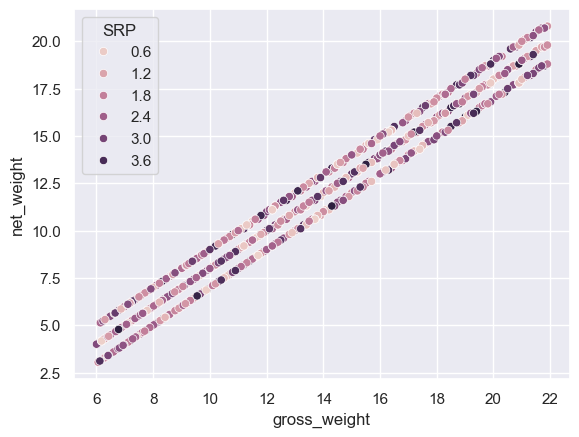

In [162]:
sns.scatterplot(x="gross_weight", y="net_weight", data=df, hue="SRP")

<Axes: xlabel='SRP', ylabel='Count'>

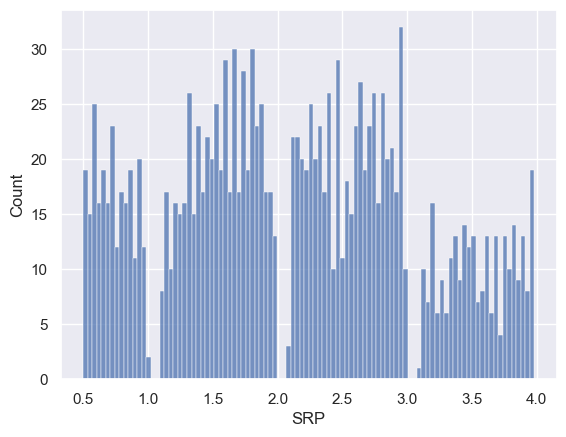

In [163]:
sns.histplot(df['SRP'], bins=100)

<Axes: xlabel='recyclable_package', ylabel='count'>

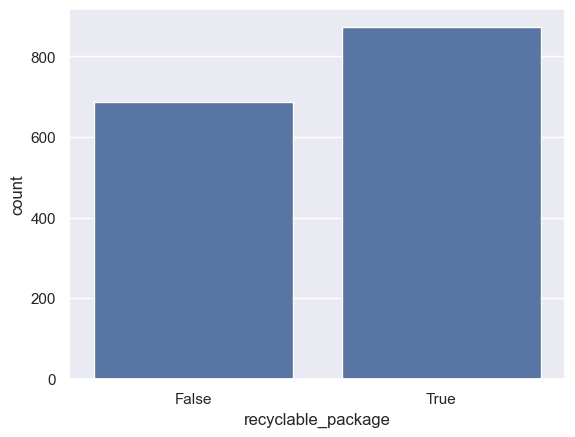

In [164]:
sns.countplot(data=df, x='recyclable_package')

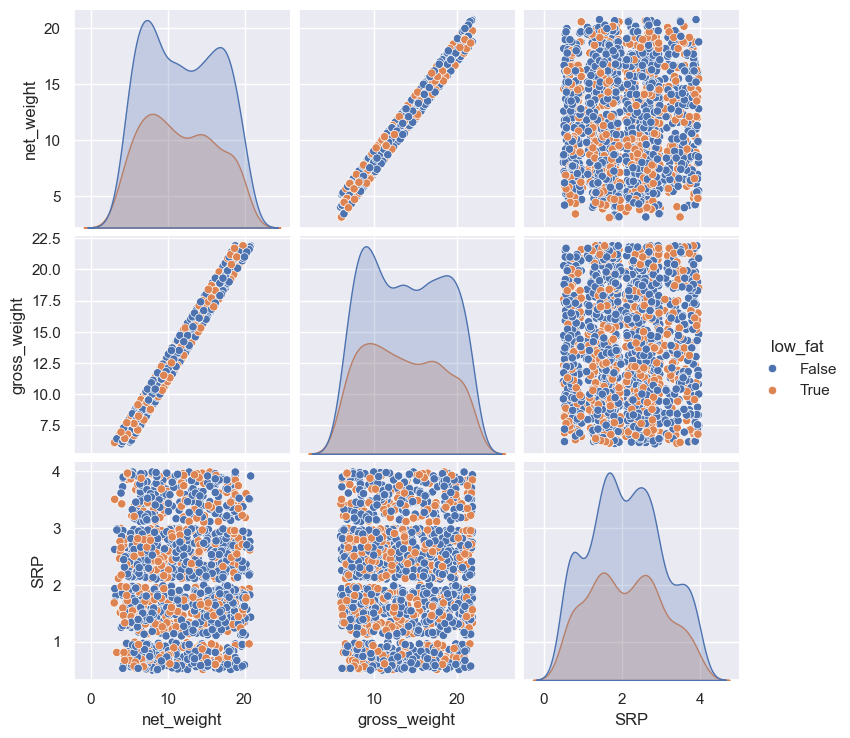

In [165]:
sns.pairplot(df, vars=['net_weight','gross_weight', 'SRP'], hue='low_fat')

<Axes: xlabel='low_fat', ylabel='gross_weight'>

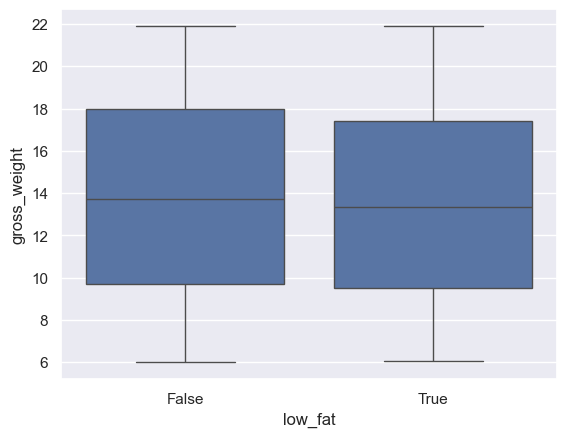

In [166]:
sns.boxplot(x='low_fat', y='gross_weight', data=df)

In [167]:
c = df.select_dtypes(include=['float64', 'int64']).corr() #Матрица корреляций

print(c)

                  product_class_id  product_id       SKU       SRP  \
product_class_id          1.000000   -0.002402  0.017435  0.002760   
product_id               -0.002402    1.000000  0.017311 -0.023605   
SKU                       0.017435    0.017311  1.000000  0.012730   
SRP                       0.002760   -0.023605  0.012730  1.000000   
gross_weight              0.016571    0.026576 -0.031194  0.039002   
net_weight                0.020078    0.027628 -0.034787  0.035126   
units_per_case            0.030086   -0.022612  0.051039 -0.007463   
cases_per_pallet          0.026114    0.003134  0.003085  0.027571   
shelf_width              -0.012498   -0.013184  0.036470 -0.002386   
shelf_height             -0.058760   -0.016140 -0.008431 -0.004312   
shelf_depth               0.028178    0.025611  0.023001 -0.012554   

                  gross_weight  net_weight  units_per_case  cases_per_pallet  \
product_class_id      0.016571    0.020078        0.030086          0.026114   

In [168]:
print(df.isnull().sum())

product_class_id      0
product_id            0
brand_name            0
product_name          0
SKU                   0
SRP                   0
gross_weight          0
net_weight            0
recyclable_package    0
low_fat               0
units_per_case        0
cases_per_pallet      0
shelf_width           0
shelf_height          0
shelf_depth           0
dtype: int64


### Таблица не содержит пропусков

In [169]:
# Поиск выбросов в данных и создание дополнительных столбцов маркеров для пометки выбросов

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[f'outlier_{col}'] = detect_outliers_iqr(df[col])
    
print(df)

      product_class_id  product_id  brand_name  \
0                   30           1  Washington   
1                   52           2  Washington   
2                   52           3  Washington   
3                   19           4  Washington   
4                   19           5  Washington   
...                ...         ...         ...   
1555                53        1556         CDR   
1556                33        1557         CDR   
1557                53        1558         CDR   
1558                33        1559         CDR   
1559                31        1560         CDR   

                        product_name          SKU   SRP  gross_weight  \
0             Washington Berry Juice  90748583674  2.85          8.39   
1             Washington Mango Drink  96516502499  0.74          7.42   
2        Washington Strawberry Drink  58427771925  0.83         13.10   
3              Washington Cream Soda  64412155747  3.64         10.60   
4               Washington Diet So

In [170]:
# Преобразование строк к нижнему регистру
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lower())

print(df[['brand_name', 'product_name']])

      brand_name                    product_name
0     washington          washington berry juice
1     washington          washington mango drink
2     washington     washington strawberry drink
3     washington           washington cream soda
4     washington            washington diet soda
...          ...                             ...
1555         cdr        cdr creamy peanut butter
1556         cdr        cdr strawberry preserves
1557         cdr  cdr extra chunky peanut butter
1558         cdr             cdr apple preserves
1559         cdr                 cdr grape jelly

[1560 rows x 2 columns]


In [171]:
# Удалим дубликаты имени бренда в названиях продуктов
df['product_name'] = df.apply(lambda row: row['product_name'].replace(row['brand_name'] + ' ', '', 1), axis=1)

print(df[['brand_name', 'product_name']])

      brand_name                product_name
0     washington                 berry juice
1     washington                 mango drink
2     washington            strawberry drink
3     washington                  cream soda
4     washington                   diet soda
...          ...                         ...
1555         cdr        creamy peanut butter
1556         cdr        strawberry preserves
1557         cdr  extra chunky peanut butter
1558         cdr             apple preserves
1559         cdr                 grape jelly

[1560 rows x 2 columns]
